Prepare the environment
-----------------------

First we'll import various functions that we'll need for generating the report. 

In [1]:
%matplotlib inline

from os import environ
from os.path import join, exists, expandvars
import pandas as pd
from skbio.draw import boxplots

from taxcompare.eval_framework import (get_expected_tables_lookup, 
                                       find_and_process_result_tables,
                                       compute_mock_results,
                                       compute_mantel,
                                       generate_pr_scatter_plots,
                                       boxplot_from_data_frame,
                                       heatmap_from_data_frame,
                                       method_by_dataset_a1,
                                       method_by_dataset_a2)

Configure local environment-specific values
-------------------------------------------

**This is the only cell that you will need to edit to generate reports locally.** After editing this cell, you can run all cells in this notebook to generate your analysis report. Some of the analyses make take a few minutes to run, and analyses at more specific taxonomic levels (e.g., genus or species) will be slower than analyses at more general taxonomic levels (e.g., phylum, class). 

**This cell will not run until you fill in a taxonomic level (``2`` through ``7``).**

In [2]:
## project_dir should be the directory where you've downloaded (or cloned) the 
## short-read-tax-assignment repository. 
project_dir = expandvars("$HOME/data/short-read-tax-assignment")

precomputed_results_dir = expandvars("$HOME/data/short-read-tax-assignment/data/precomputed-results/")
expected_results_dir = join(precomputed_results_dir, "mock-community")

## results_dirs should contain the directory or directories where
## results can be found. By default, this is just the precomputed 
## results included with the project. If other results should be included, 
## absolute paths to those directories should be added to this list.
results_dirs = \
 [precomputed_results_dir,
  ]

## Taxonomic level at which analyses should be performed. Edit this to
## the desired taxonomic level. 
# 2: phylum, 3: class, 4: order, 5: family, 6: genus, 7: species
taxonomic_level = int(environ['taxonomic_level'])

## Minimum number of times an OTU must be observed for it to be included in analyses. Edit this
## to analyze the effect of the minimum count on taxonomic results.
min_count = 10

In [3]:
# Define the subdirectories where the query mock community data should be, and confirm that they exist.
mock_results_dirs = [join(results_dir,"mock-community") for results_dir in results_dirs]

for mock_results_dir in mock_results_dirs:
    assert exists(mock_results_dir), "Mock community result directory doesn't exist: %s" % mock_results_dir


Find mock community pre-computed tables, expected tables, and "query" tables
----------------------------------------------------------------------------

Next we'll use the paths defined above to find all of the tables that will be compared. These include the *pre-computed result* tables (i.e., the ones that the new methods will be compared to), the *expected result* tables (i.e., the tables containing the known composition of the mock microbial communities), and the *query result* tables (i.e., the tables generated with the new method(s) that we want to compare to the *pre-computed result* tables).

In [4]:
results = []
for mock_results_dir in mock_results_dirs:
    results += find_and_process_result_tables(mock_results_dir)

In [5]:
expected_tables = get_expected_tables_lookup(expected_results_dir, level=taxonomic_level)

In [6]:
# Uncomment for test runs (looks at a small subset of the data)

# from random import shuffle
# shuffle(results)
# results = results[:10]

Evalution 1: Compute and summarize precision, recall, and F-measure for mock communities
----------------------------------------------------------------------------------------

In this evaluation, we compute and summarize precision, recall, and F-measure of each result (pre-computed and query) based on the known composition of the mock communities. We then summarize the results in two ways: first with boxplots, and second with a table of the top methods based on their F-measures. 

This is a qualitative evaluation, effectively telling us about the ability of the different methods to report the taxa that are present in each sample. These metrics are not concerned with the abundance of the different taxa.

In [7]:
mock_results = compute_mock_results(results, expected_tables, taxonomy_level=taxonomic_level, min_count=min_count)

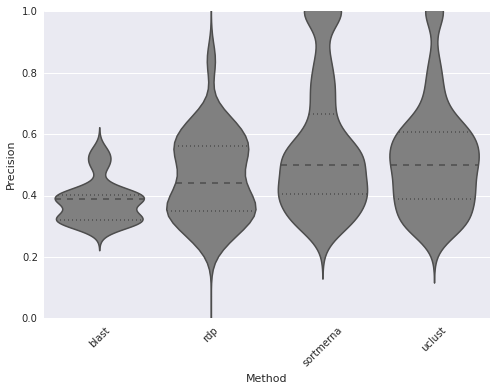

In [8]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Precision")

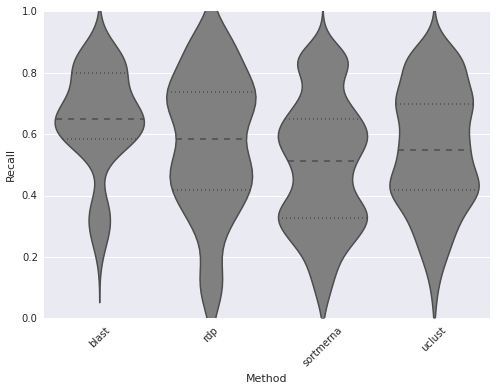

In [9]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Recall")

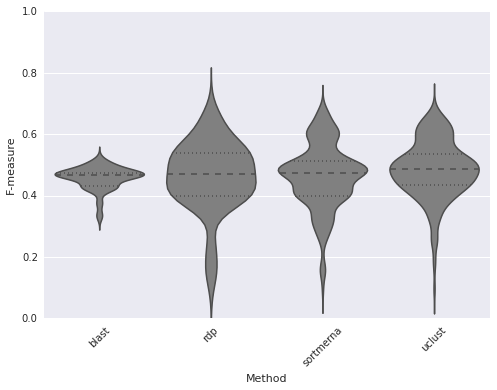

In [10]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="F-measure")

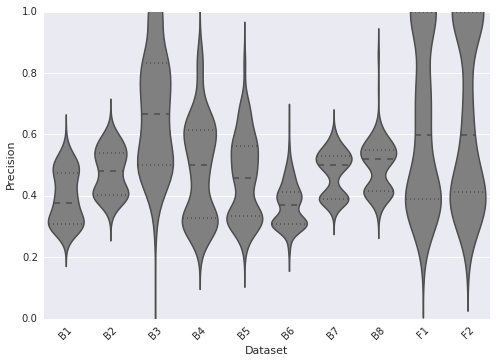

In [11]:
boxplot_from_data_frame(mock_results, group_by="Dataset", metric="Precision")

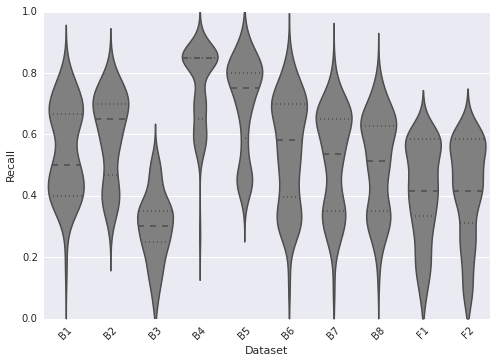

In [12]:
boxplot_from_data_frame(mock_results, group_by="Dataset", metric="Recall")

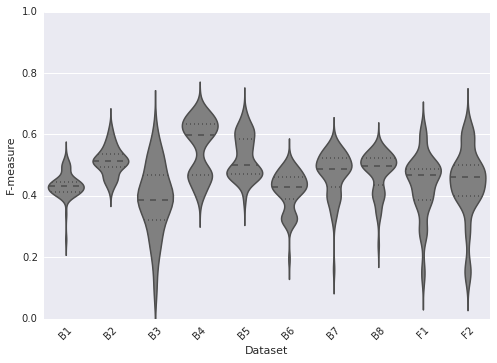

In [13]:
boxplot_from_data_frame(mock_results, group_by="Dataset", metric="F-measure")

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


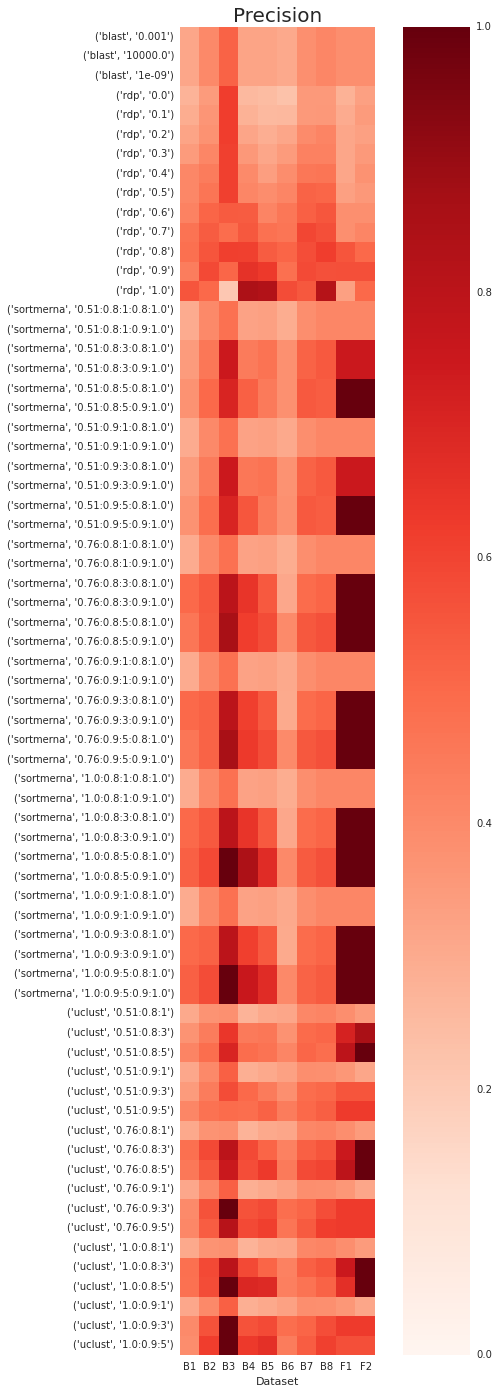

In [14]:
heatmap_from_data_frame(mock_results, "Precision")

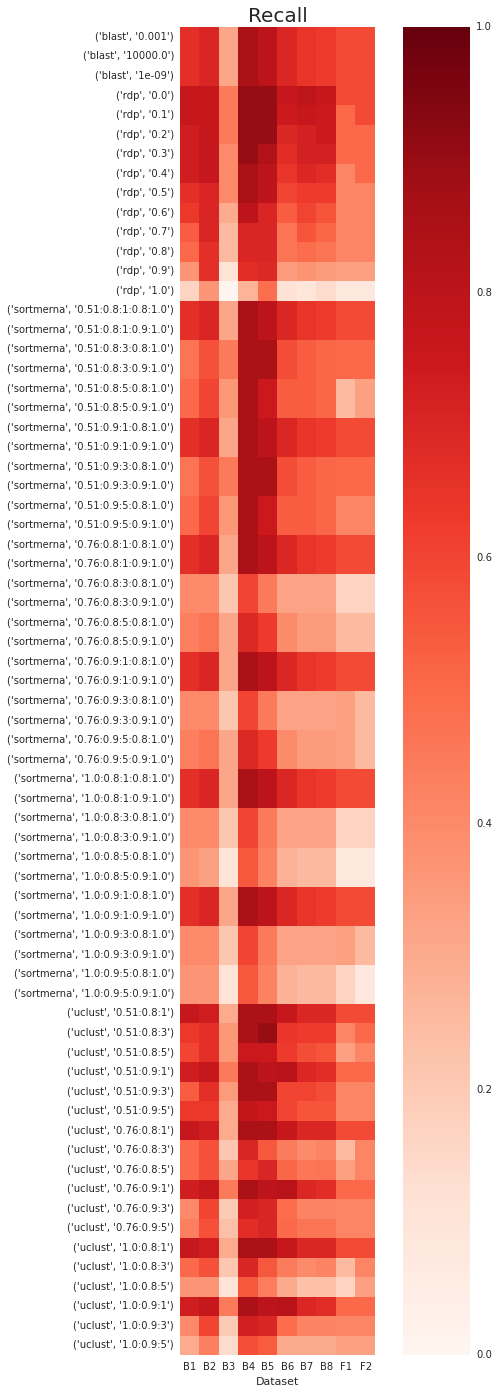

In [15]:
heatmap_from_data_frame(mock_results, "Recall")

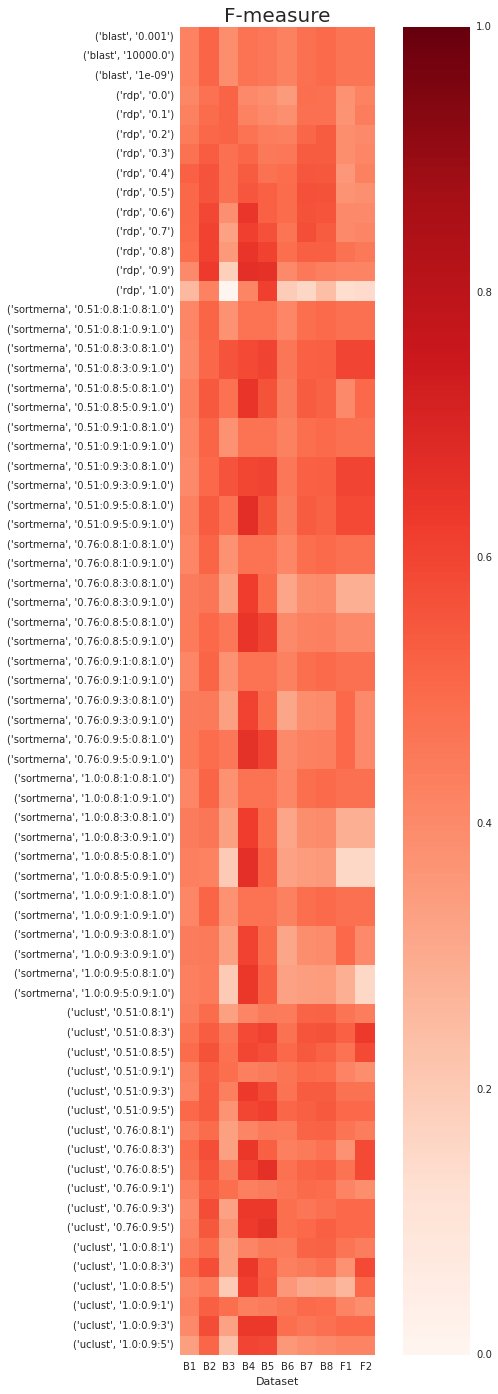

In [16]:
heatmap_from_data_frame(mock_results, "F-measure")

In [17]:
method_by_dataset_a1(mock_results, 'B1')

Method  Precision    Recall  F-measure
1945        rdp   0.407407  0.733333   0.523810
1960     uclust   0.413043  0.633333   0.500000
1926  sortmerna   0.464286  0.433333   0.448276
1940      blast   0.312500  0.666667   0.425532

In [18]:
method_by_dataset_a1(mock_results, 'B2')

Method  Precision    Recall  F-measure
43        rdp   0.588235  0.666667   0.625000
50     uclust   0.562500  0.600000   0.580645
29  sortmerna   0.500000  0.600000   0.545455
38      blast   0.403846  0.700000   0.512195

In [19]:
method_by_dataset_a1(mock_results, 'B3')

Method  Precision  Recall  F-measure
761  sortmerna   0.769231    0.50   0.606061
848        rdp   0.625000    0.50   0.555556
936     uclust   0.555556    0.50   0.526316
824      blast   0.538462    0.35   0.424242

In [20]:
method_by_dataset_a1(mock_results, 'B4')

Method  Precision  Recall  F-measure
1602        rdp   0.666667    0.70   0.682927
1542  sortmerna   0.566667    0.85   0.680000
1660     uclust   0.600000    0.75   0.666667
1574      blast   0.326923    0.85   0.472222

In [21]:
method_by_dataset_a1(mock_results, 'B5')

Method  Precision  Recall  F-measure
1219     uclust   0.666667    0.70   0.682927
1127        rdp   0.636364    0.70   0.666667
955   sortmerna   0.590909    0.65   0.619048
1096      blast   0.326531    0.80   0.463768

In [22]:
method_by_dataset_a1(mock_results, 'B6')

Method  Precision    Recall  F-measure
646     uclust   0.456140  0.604651   0.520000
619        rdp   0.469388  0.534884   0.500000
505  sortmerna   0.390625  0.581395   0.467290
586      blast   0.312500  0.697674   0.431655

In [23]:
method_by_dataset_a1(mock_results, 'B7')

Method  Precision    Recall  F-measure
205        rdp   0.600000  0.558140   0.578313
257     uclust   0.500000  0.627907   0.556701
101  sortmerna   0.547619  0.534884   0.541176
178      blast   0.388889  0.651163   0.486957

In [24]:
method_by_dataset_a1(mock_results, 'B8')

Method  Precision    Recall  F-measure
463     uclust   0.519231  0.627907   0.568421
404        rdp   0.509434  0.627907   0.562500
333  sortmerna   0.550000  0.511628   0.530120
381      blast   0.415385  0.627907   0.500000

In [25]:
method_by_dataset_a1(mock_results, 'F1')

Method  Precision    Recall  F-measure
1760  sortmerna   0.750000  0.500000   0.600000
1890     uclust   0.714286  0.416667   0.526316
1846        rdp   0.555556  0.416667   0.476190
1816      blast   0.388889  0.583333   0.466667

In [26]:
method_by_dataset_a1(mock_results, 'F2')

Method  Precision    Recall  F-measure
1413     uclust   0.857143  0.500000   0.631579
1252  sortmerna   0.750000  0.500000   0.600000
1336      blast   0.388889  0.583333   0.466667
1370        rdp   0.500000  0.416667   0.454545

Evaluation 2: Compute and summarize correlations between observed and known mock community structure
----------------------------------------------------------------------------------------------------

In this evaluation, we compute and summarize the correlation between each result (pre-computed and query) and the known composition of the mock communities. We then summarize the results in two ways: first with a series of boxplots of correlation coefficients by method; and second with a table of the top methods based on their Pearson correlation coefficient. 

This is a quantitative evaluation, which tells us about the ability of the different methods to report the taxa that are present in each sample and accurately assess their abundance. Because many factors can affect the observed abundance of taxa beyond the accuracy of the taxonomic assigner (e.g., primer bias), the correlation coefficients are frequently low, but we expect that their relative values are informative in understanding which taxonomic assigners are more correct than others.

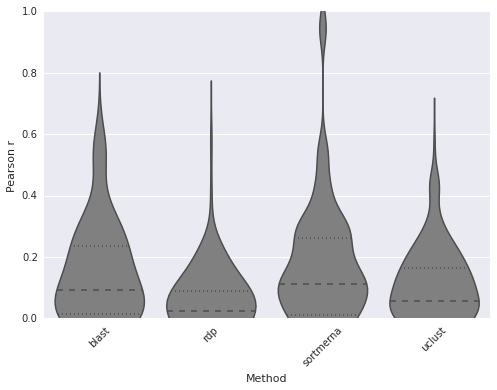

In [27]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Pearson r")

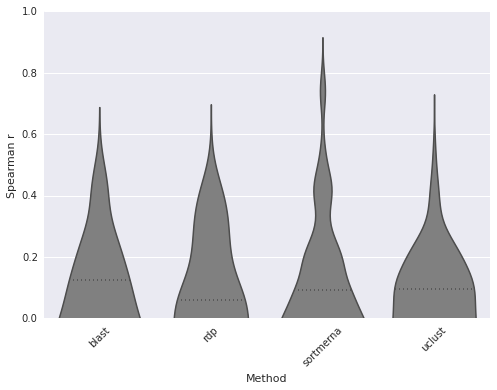

In [28]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Spearman r")

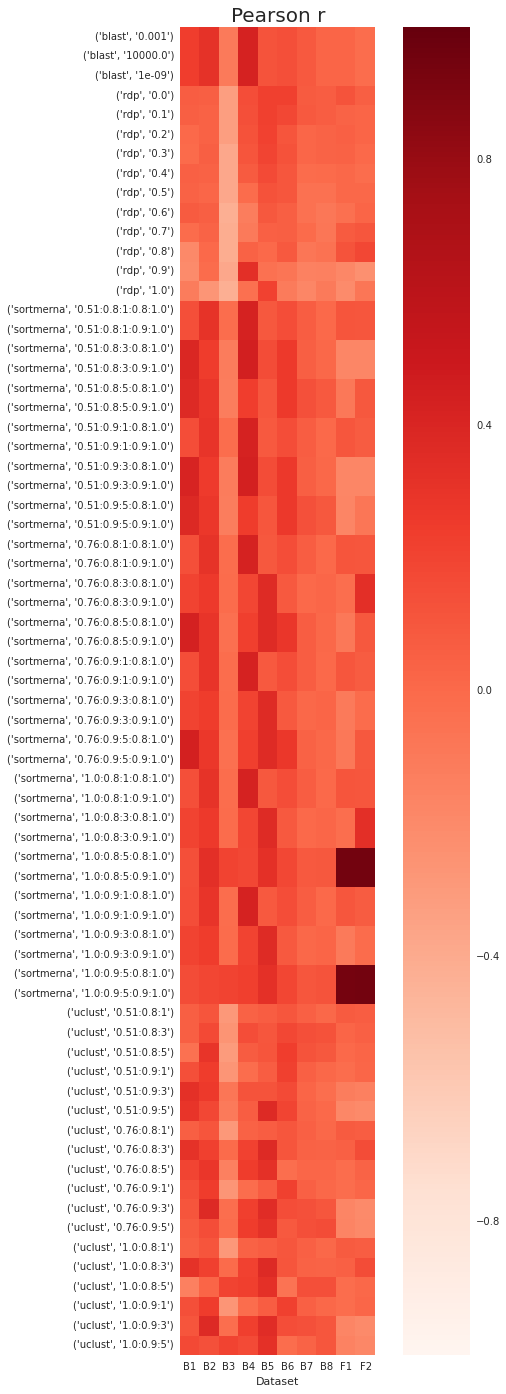

In [29]:
heatmap_from_data_frame(mock_results, "Pearson r", vmin=-1, vmax=1)

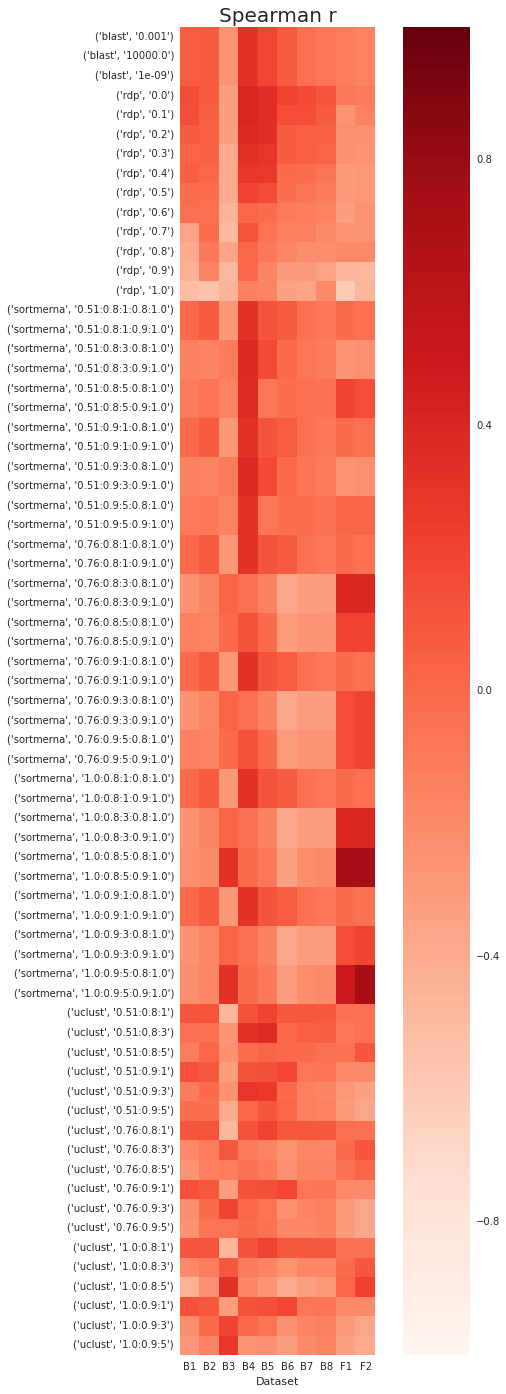

In [30]:
heatmap_from_data_frame(mock_results, "Spearman r", vmin=-1, vmax=1)

In [31]:
method_by_dataset_a2(mock_results, 'B1')

Method  Pearson r  Spearman r
1904  sortmerna   0.438950   -0.134178
1958     uclust   0.322267   -0.112791
1940      blast   0.234395    0.067664
1951        rdp   0.081910   -0.037750

In [32]:
method_by_dataset_a2(mock_results, 'B2')

Method  Pearson r  Spearman r
50     uclust   0.370499   -0.008801
34  sortmerna   0.335877   -0.205204
36      blast   0.314917    0.085509
49        rdp   0.058350    0.039086

In [33]:
method_by_dataset_a2(mock_results, 'B3')

Method  Pearson r  Spearman r
816  sortmerna   0.573428    0.543990
908     uclust   0.573428    0.543990
831      blast   0.230365   -0.030523
839        rdp  -0.104606   -0.083661

In [34]:
method_by_dataset_a2(mock_results, 'B4')

Method  Pearson r  Spearman r
1600        rdp   0.580118    0.008172
1557  sortmerna   0.547427    0.213715
1581      blast   0.545349    0.219213
1657     uclust   0.322237   -0.345711

In [35]:
method_by_dataset_a2(mock_results, 'B5')

Method  Pearson r  Spearman r
1176     uclust   0.467841   -0.048844
1074  sortmerna   0.435440   -0.212891
1114        rdp   0.402857   -0.306525
1104      blast   0.242195    0.125594

In [36]:
method_by_dataset_a2(mock_results, 'B6')

Method  Pearson r  Spearman r
543  sortmerna   0.333431   -0.301513
653     uclust   0.262325   -0.008362
615        rdp   0.229696    0.223982
590      blast   0.152887    0.084251

In [37]:
method_by_dataset_a2(mock_results, 'B7')

Method  Pearson r  Spearman r
239     uclust   0.148132   -0.330318
101  sortmerna   0.140849   -0.023520
195        rdp   0.105626    0.139014
182      blast   0.097143   -0.027907

In [38]:
method_by_dataset_a2(mock_results, 'B8')

Method  Pearson r  Spearman r
433     uclust   0.165739   -0.137457
325  sortmerna   0.135979   -0.189345
398        rdp   0.084364    0.060173
387      blast   0.032004   -0.073664

In [39]:
method_by_dataset_a2(mock_results, 'F1')

Method  Pearson r  Spearman r
1803  sortmerna   0.946100    0.738549
1840        rdp   0.141491   -0.068080
1888     uclust   0.103179   -0.033106
1816      blast   0.041278   -0.118632

In [40]:
method_by_dataset_a2(mock_results, 'F2')

Method  Pearson r  Spearman r
1324  sortmerna   0.946100    0.738549
1368        rdp   0.238588   -0.183393
1409     uclust   0.184703    0.107899
1333      blast   0.013114   -0.134633